In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
import pandas as pd
df_times=pd.read_csv('times_temp.txt',header=None,names=['n','start','end','diff','t'])

In [36]:
diffs=df_times.t.to_numpy()[1:-1]-df_times.t.to_numpy()[:-2]

In [37]:
(dur,rat)=np.mean(diffs),1./np.mean(diffs)
print( dur, rat)

0.0002152659592766991 4645.416318307055


In [38]:
fil=open('movies/movie.bin','rb')
wid=1024
bits=np.fromfile(fil,dtype='uint8')
fil.close()
bits=np.reshape( bits, (np.shape(bits)[0]//wid, 1, wid) )

In [39]:
np.shape(bits)

(93020, 1, 1024)

In [40]:
pwd

'/home/coateslab/projects/basler_grab'

In [41]:
np.mean(bits,axis=2)

array([[26.45703125],
       [26.421875  ],
       [26.5859375 ],
       ...,
       [26.28515625],
       [26.55859375],
       [26.41015625]])

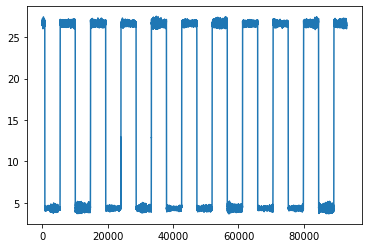

In [42]:
# AVerage frame luminance across time/samples
plt.plot(np.mean(bits,axis=2))

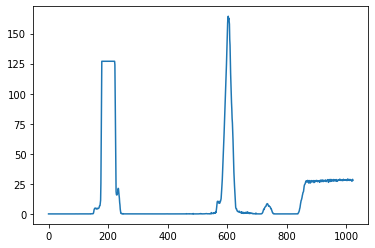

In [43]:
# Average luminance of each pixel on the row (across all samples of movie)
plt.plot( np.mean(bits,axis=0)[0] )


In [45]:
#nsamples=90000
#xr=np.arange(nsamples)*dur*1000

#plt.plot(xr,bits[4000:4000+nsamples,:,40])
#plt.plot(xr,bits[4000:4000+nsamples,:,-1],color='orange')

In [47]:
# "Trigger" pixel

bits1=bits[:,0,200]
bits_shutter=bits[:,0,-1]

# Determine difference in intensity between successive frames at the pixel of interest
deriv=np.array( bits1[1:],dtype='int16')-bits1[:-1]

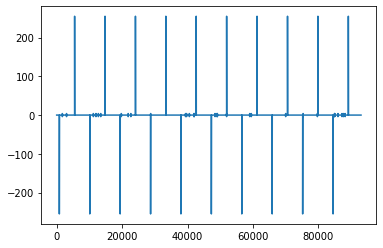

In [48]:
# look at deriv to determine threshold
plot(deriv)

In [49]:
THRESH_INTENSITY=100
MAX_SAMPLES_BETWEEN_FLASHES=6000 # TODO: Could specify in clock time

In [50]:
bigs=np.where( deriv>THRESH_INTENSITY)[0]

last=0
flash_onsets=[]
for n in bigs:
    if (n-last)>MAX_SAMPLES_BETWEEN_FLASHES:
        flash_onsets.append( n )
        last=n
        
flash_onsets=np.array(flash_onsets)

In [51]:
flash_onsets

array([14780, 24076, 33371, 42646, 51942, 61237, 70551, 79846, 89141])

In [52]:
flash_onsets[1:]-flash_onsets[:-1]

array([9296, 9295, 9275, 9296, 9295, 9314, 9295, 9295])

In [53]:
#  Time between offsets
(flash_onsets[1:]-flash_onsets[:-1])*dur #*0.0005

array([2.00111236, 2.00089709, 1.99659177, 2.00111236, 2.00089709,
       2.00498714, 2.00089709, 2.00089709])

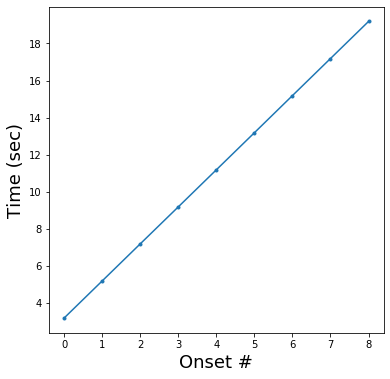

In [55]:
plt.figure(figsize=(6,6))
plt.plot( flash_onsets*dur, '.-')
plt.xlabel('Onset #', size=18)
plt.ylabel('Time (sec)', size=18)
plt.savefig('time_vs_onset.pdf', bbox_inches='tight')

In [56]:
len(flash_onsets)

9

In [57]:
pwd

'/home/coateslab/projects/basler_grab'

In [60]:
plt.figure( figsize=(8,6))

for which_sample in range(len(flash_onsets)-1):
    #which_first=40
    #nsamps=1100
    
    which_first=10 # add/subtract arbitrary offset
    nsamps=8000    # How many samples to include per onset
    xr=np.arange(nsamps)*dur
    plt.plot(xr, bits1[flash_onsets[which_sample]-
                       which_first:flash_onsets[which_sample]-which_first+nsamps]
             , '.-',color='slateblue')
  
    plt.text(0,140, '%02d'%which_sample,size=20,color='crimson')
    plt.ylabel('Pixel intensity', size=18)
    plt.xlabel('Time (sec)', size=18)
    #plt.ylim(0,155)
    
    plt.savefig('animz/im%03d.png'%which_sample)

    plt.clf()

<Figure size 576x432 with 0 Axes>

In [61]:
plt.figure( figsize=(8,6))

for which_sample in range(len(flash_onsets)-1):
    
    which_first=int(rat*0.100)
    nsamps=int( rat*0.2 )
    
    #which_first=10
    #nsamps=260
    xr=np.arange(nsamps)*dur
    plt.plot(xr, bits1[flash_onsets[which_sample]-which_first:flash_onsets[which_sample]-which_first+nsamps], '.-',color='slateblue')

    plt.plot(xr,1* bits_shutter[flash_onsets[which_sample]-which_first:flash_onsets[which_sample]-which_first+nsamps], '.-',color='orange')

    
    plt.text(0,140, '%02d'%which_sample,size=20,color='crimson')
    plt.ylabel('Pixel intensity', size=18)
    plt.xlabel('Time (sec)', size=18)
    plt.ylim(0,155)
    
    plt.savefig('anim/im%03d.png'%which_sample)

    plt.clf()

<Figure size 576x432 with 0 Axes>

In [64]:
dur*6

0.0012915957556601946

In [14]:
from numpy import fft

[]

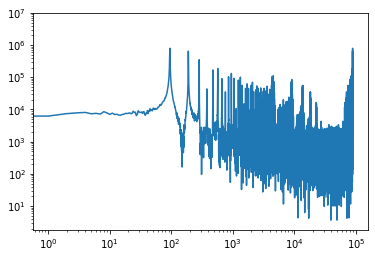

In [20]:
plt.plot( np.abs( fft.fft(bits[:,0,0]) ))
plt.loglog()

In [67]:
pix1=( bits[:,0,1024])

In [78]:
rises=np.where( np.all( (pix1[1:]>70, pix1[:-1]<70),axis=0) )[0]

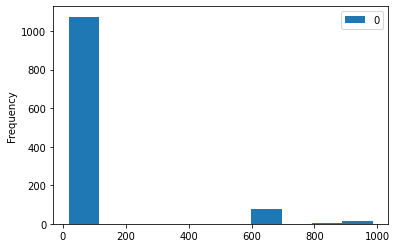

In [90]:
pd.DataFrame( ( rises[1:]-rises[:-1] )).plot(kind='hist')

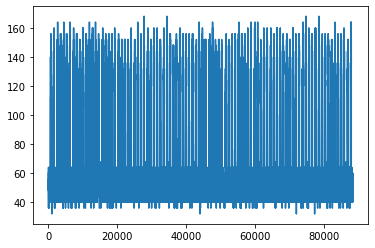

In [76]:
plt.plot( pix1 )

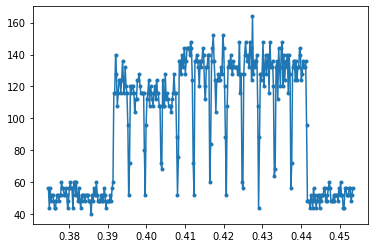

In [40]:
x1=150;x2=500;
plt.plot(df_times.t[x1:x2], bits[x1:x2,0,1024],'.-' )

In [35]:
df_times.t

0       0.340919
1       0.341137
2       0.341451
3       0.341624
4       0.341817
          ...   
8843    2.334940
8844    2.335180
8845    2.335390
8846    2.335610
8847    2.347710
Name: t, Length: 8848, dtype: float64